# Assignment Week 10: Text Mining using Dimensionality Reduction Methods

## Student ID: 250890594

This dataset comes from the website [Internet Movie Database](https://www.imdb.com/), and represents 1,000 reviews which were labeled (by humans) as positive or negative, see [here](http://ai.stanford.edu/~amaas/data/sentiment/) for more details. In this coursework, we will study how we can use dimensionality reduction methods to improve our understanding of text data and to predict the sentiment of a set of texts. This application of data science is called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) and it is widely used across many fields to get automated feedback when text opinions are expressed. While most modern methods of sentiment analysis are using complex deep learning methods, the tools we have seen this week can be readily applied to get a good idea of what our users are expressing.

In [1]:
# Import other packages if you need them!
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn.feature_extraction.text as sktext
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Data import

The dataset comes with the text and a binary variable which represents the sentiment, either positive or negative. The following code imports the data, splits it into train and test, and applies the [Tf-Idf transform](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) (see the lectures, slide 34).

In [2]:
# Be sure to first leave the data here!
imdb_data = pd.read_excel('~/Desktop/IMDB_Sample.xlsx')


# Scikit-Learn works by first defining the der 
TfIDFTransformer = sktext.TfidfVectorizer(strip_accents='unicode', # Eliminate accents and special characters
                      stop_words='english', # Eliminates stop words.
                      min_df = 0.05, # Eliminate words that do not appear in more than 5% of texts
                      max_df = 0.95, # Eliminate words that appear in more than 95% of texts
                      sublinear_tf=True # Use sublinear weights (softplus)
                      )

# Train / test split
x_train, x_test, y_train, y_test = train_test_split(imdb_data['texts'],
                                                    imdb_data['class'],
                                                    test_size=0.3,
                                                    random_state=20210318)

# Calculate the Tf-Idf transform.
TfIDF_train = TfIDFTransformer.fit_transform(x_train)
TfIDF_test = TfIDFTransformer.transform(x_test)

# Turn to dense matrix as PCA does not like sparse ones.
TfIDF_train = TfIDF_train.toarray()
TfIDF_test = TfIDF_test.toarray()

From here on, you will use the variables `TfIDF_train` and `TfIDF_test` as the input for the different tasks, and the `y_train` and `y_test` labels for each dataset (if required).  The output is a **sparse matrix** with the 236 words that do not appear in more than 95% of texts nor in less than 5% of texts. These matrices only store the relevant information! They are *much* more efficient in-memory.  Sadly, PCA nor torch deal very well with sparse matrices without further processing, so we turn them into dense matrices.

We can check the outputs of the first row with the below code.

In [37]:
print(TfIDF_train[1,:])
print(TfIDF_train.shape)

[0.         0.         0.         0.         0.         0.16565558
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.24573797 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.17111284 0.
 0.         0.         0.         0.         0.17934085 0.
 0.18989355 0.         0.20293873 0.         0.         0.
 0.         0.         0.15861506 0.         0.28146216 0.15964171
 0.         0.         0.13397591 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.2143442  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11417021 0.
 0.         0.         0.         0.         0.19858848 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.1750

Each column represents one word and each non-zero value represents the Tf-IDF weight as seen in the lectures. To find out which word is which in the index, you can use the [`TfIDFTransformer.get_feature_names()` method](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [4]:
print('There are %i words in the index.' % len(TfIDFTransformer.get_feature_names()))

There are 236 words in the index.


## Task 1: PCA decomposition of the texts. [35 pts]

Now you have the TfIDF matrix, We can start working on the data. As a first step, we want to explore what some commonly occuring concepts in the text reviews. We can do this using PCA. A PCA transform of the TF-IDF matrix will give you a basis of the text data, each representing a *concept* or set of words that are correlated. Correlation in text can be interpreted as a relation to a similar topic.

1. First, calculate a PCA transform of the training data using the **maximum** number of concepts possible. Make a plot of the explained variance that shows the cumulative explained variance per number of concepts. 

**Written answer: Exactly how many concepts do you need to correctly explain at least 75% of the data? (note we need the exact # of concepts)**  [15 pts]

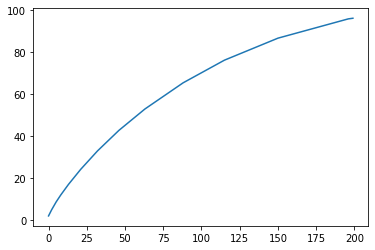

In [12]:
# Your code here.
nPCA = PCA(n_components = 200)
nPCA.fit(TfIDF_train)
variance = nPCA.explained_variance_ratio_
variance = np.cumsum(np.round(nPCA.explained_variance_ratio_,decimals=3)*100)
variance
# Make the plot
plt.plot(variance)

In [30]:
# To get the exact index where the variance is above 75%
print(variance)
# result = np.where(variance == 75.1)
# print('Tuple of arrays returned : ', result)
# print("Elements with value  exists at following indices", result[0], sep='\n')
print("Elements with value 75.1 exists at following indices", 115)

[ 2.   3.5  4.9  6.2  7.5  8.7  9.8 10.9 12.  13.  14.  15.  16.  17.
 17.9 18.8 19.7 20.6 21.5 22.4 23.3 24.2 25.  25.8 26.6 27.4 28.2 29.
 29.8 30.6 31.4 32.2 33.  33.7 34.4 35.1 35.8 36.5 37.2 37.9 38.6 39.3
 40.  40.7 41.4 42.1 42.8 43.4 44.  44.6 45.2 45.8 46.4 47.  47.6 48.2
 48.8 49.4 50.  50.6 51.2 51.8 52.4 53.  53.5 54.  54.5 55.  55.5 56.
 56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5 63.
 63.5 64.  64.5 65.  65.5 65.9 66.3 66.7 67.1 67.5 67.9 68.3 68.7 69.1
 69.5 69.9 70.3 70.7 71.1 71.5 71.9 72.3 72.7 73.1 73.5 73.9 74.3 74.7
 75.1 75.5 75.9 76.3 76.6 76.9 77.2 77.5 77.8 78.1 78.4 78.7 79.  79.3
 79.6 79.9 80.2 80.5 80.8 81.1 81.4 81.7 82.  82.3 82.6 82.9 83.2 83.5
 83.8 84.1 84.4 84.7 85.  85.3 85.6 85.9 86.2 86.5 86.8 87.  87.2 87.4
 87.6 87.8 88.  88.2 88.4 88.6 88.8 89.  89.2 89.4 89.6 89.8 90.  90.2
 90.4 90.6 90.8 91.  91.2 91.4 91.6 91.8 92.  92.2 92.4 92.6 92.8 93.
 93.2 93.4 93.6 93.8 94.  94.2 94.4 94.6 94.8 95.  95.2 95.4 95.6 95.8
 96.  96.1 

**Written answer: **
Exactly at 115 concepts I need to correctly explain at least 75% of the data.

2. Study the first three concepts. To do this, show the 10 words that are the most important in the each of these three concepts (as revealed by the absolute value of the PCA weight in each concept).

**Written answer: What is the cumulative variance explained by these three concepts? What would you name each of these concepts?** [10 pts]
*Hint: if in a concept you would get the words 'dog', 'cat', 'fish' as the most important ones, you could name the concept 'animals' or 'pets'.*

In [121]:
# Explained variance.
print(np.sum(nPCA.explained_variance_ratio_[0:3]))

0.048604638960120294


In [122]:
# Get words per component
Q1_FeatureNames = np.array(TfIDFTransformer.get_feature_names())

In [124]:
# Concept 1
concept1 = nPCA.components_[0, ]
concept1 = np.abs(concept1)
concept1_idx = np.argpartition(concept1, -10)[-10:] 

print(Q1_FeatureNames[concept1_idx])

['don' 'best' 'woman' 'films' 'like' 'movies' 'film' 'bad' 'watch' 'movie']


In [127]:
# Concept 2
concept2 = nPCA.components_[1, ]
concept2 = np.abs(concept2)
concept2_idx = np.argpartition(concept2, -10)[-10:] 

print(Q1_FeatureNames[concept2_idx])

['say' 'love' 'films' 'film' 'like' 'great' 'way' 'series' 'story' 'bad']


In [128]:
# Concept 3
concept3 = nPCA.components_[2, ]
concept3 = np.abs(concept3)
concept3_idx = np.argpartition(concept3, -10)[-10:] 

print(Q1_FeatureNames[concept3_idx])

['new' 'acting' 'old' 'seen' 'funny' 'star' 'man' 'series' 'movie' 'film']


**Written answer: **
0.048604638960120294 concept1:female-targeted movies concept2:story-telling movies concept3:old movies

3. Apply the PCA transformation to the test dataset. Using only the first two components, make a scatter plot of the cases. Identify positive and negative cases by colouring points with different sentiments with different colours. 

**Written answer: What can you say about where the positive and negative cases lie in your plot? Could we use these concepts to discriminate positive and negative cases? If yes, why? If no, why not? Discuss your findings.** [10 pts]

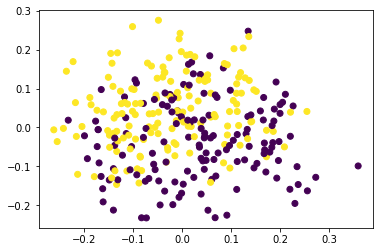

In [129]:
# Apply the test data
Q1_X_test_tranformed = nPCA.transform(TfIDF_test)
# Plot the two different set of points filtering by label.
plt.scatter(Q1_X_test_tranformed[:, 0], Q1_X_test_tranformed[:, 1], c = y_test)

**Written answer:**
no, there's a lot of overlapping with postive and negative classes.

## Task 2: Autoencoders [35 pts]

We will see now the ability of autoencoders to compress the data. Train an autoencoder that compresses the data to 60 neurons in the encoding layer as shown in lab 10.2, to be trained over the original TfIDF train dataset. Use a total of 5 fully connected layers going from 236 to 100 to 60 to 100 to 236 units. Use a relu non-linearity for each of them. Then try at two more variations of this network. You could vary the number of hidden units, number of layers, or the type of nonlinearity that you are using. Train the models, each time reducing model reconstruction error. For each model you train, plot the reconstruction error (MSE) over the train set and the test set as you train every 100 rounds. 

**Written answer: Which of your models performs the best? After how many epochs does your best model reach convergence? Does your model overfit? If yes, why do you think this is? If no, why?** [10 pts each architecture plus 5 pts arguing which one is better plus the explaining of overfitting]

In [114]:
# Model architecture and definition
from sklearn.preprocessing import StandardScaler
error_train = []
error_test = []
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(236,100),
            nn.ReLU(),
            nn.Linear(100,60),
            nn.ReLU(),
            )
        self.decoder = nn.Sequential(
            nn.Linear(60,100),
            nn.Linear(100,236),
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
#build model
auto_enc_11 = autoencoder()

#define loss function
loss_fn = torch.nn.MSELoss()

#define learning rate
learning_rate = 1e-1

#convert dataset to tensors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(TfIDF_train)
X_scaled_test = torch.from_numpy(TfIDF_test).float()
X_scaled = torch.from_numpy(TfIDF_train)
# Train!
for t in range (5000):
  y_pred = auto_enc_11(X_scaled.float())
  loss = loss_fn(y_pred, X_scaled.float())
  auto_enc_11.zero_grad()
  loss.backward()
  with torch.no_grad():
    for param in auto_enc_11.parameters():
        param -= learning_rate * param.grad 
    if t % 1000 == 999:
        print(t, loss2.item())
    if t % 100 == 0:
        error_train.append(loss.item())
        y_pred = auto_enc_11(X_scaled_test)
        loss = loss_fn(y_pred, X_scaled_test)
        error_test.append(loss.item())

999 0.0037517694290727377
1999 0.0037517694290727377
2999 0.0037517694290727377
3999 0.0037517694290727377
4999 0.0037517694290727377


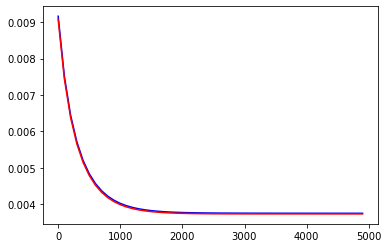

In [117]:
# Plot errors
#pass scaled data to the autoencoder
plt.plot(range(0, 5000, 100), error_train, c="blue")
plt.plot(range(0, 5000, 100), error_test, c="red")
# X_reconstructed = auto_enc_11(X_scaled.float())
# #plot the distribution of the reconstruction error
# sns.distplot(X_scaled - X_reconstructed.detach().numpy())
# plt.xlabel("Reconstruction Error")
# plt.title("Reconstruction Error Distribution for Autoencoder")

In [113]:
# Model architecture and definition
error_train2 = []
error_test2 = []
class autoencoder2(nn.Module):
    def __init__(self):
        super(autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(236,160),
            nn.ReLU(),
            nn.Linear(160,40),
            nn.ReLU(),
            )
        self.decoder = nn.Sequential(
            nn.Linear(40,160),
            nn.Linear(160,236),
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
#build model
auto_enc2 = autoencoder2()

#define loss function
loss_fn = torch.nn.MSELoss()

#define learning rate
learning_rate = 1e-1

#convert dataset to tensors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(TfIDF_train)
X_scaled = torch.from_numpy(TfIDF_train)
# Train!
for t in range (5000):
  y_pred2 = auto_enc2(X_scaled.float())
  loss2 = loss_fn(y_pred2, X_scaled.float())
  auto_enc2.zero_grad()
  loss2.backward()
  with torch.no_grad():
    for param in auto_enc2.parameters():
        param -= learning_rate * param.grad 
    if t % 1000 == 999:
        print(t, loss2.item())
    if t % 100 == 0:
        error_train2.append(loss2.item())
        y_pred = auto_enc2(X_scaled_test)
        loss2 = loss_fn(y_pred, X_scaled_test)
        error_test2.append(loss2.item())
# for t in range (5000):
#   y_pred2 = auto_enc2(X_scaled.float())
#   loss2 = loss_fn(y_pred2, X_scaled.float())
#   if t % 1000 == 999:
#         print(t, loss2.item())
#   auto_enc2.zero_grad()
#   loss2.backward()
#   with torch.no_grad():
#         for param in auto_enc2.parameters():
#             param -= learning_rate * param.grad 

999 0.003838512348011136
1999 0.003755714511498809
2999 0.003753031138330698
3999 0.0037523608189076185
4999 0.0037517694290727377


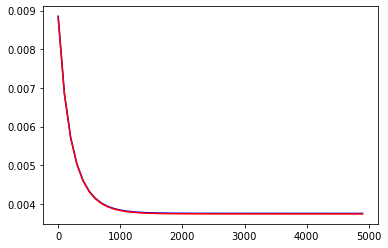

In [116]:
# Plot errors
plt.plot(range(0, 5000, 100), error_train2, c="blue")
plt.plot(range(0, 5000, 100), error_test2, c="red")
# #pass scaled data to the autoencoder
# X_reconstructed2 = auto_enc2(X_scaled.float())
# #plot the distribution of the reconstruction error
# sns.distplot(X_scaled - X_reconstructed2.detach().numpy())
# plt.xlabel("Reconstruction Error")
# plt.title("Reconstruction Error Distribution for Autoencoder")

In [115]:
# Model architecture and definition
error_train3 = []
error_test3 = []
class autoencoder3(nn.Module):
    def __init__(self):
        super(autoencoder3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(236,150),
            nn.ReLU(),
            nn.Linear(150,100),
            nn.ReLU(),
            nn.Linear(100,60),
            nn.ReLU(),
            )
        self.decoder = nn.Sequential(
            nn.Linear(60,100),
            nn.Linear(100,150),
            nn.Linear(150,236),
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
#build model
auto_enc3 = autoencoder3()

#define loss function
loss_fn = torch.nn.MSELoss()

#define learning rate
learning_rate = 1e-1

#convert dataset to tensors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(TfIDF_train)
X_scaled = torch.from_numpy(TfIDF_train)
# Train!
for t in range (5000):
  y_pred3 = auto_enc3(X_scaled.float())
  loss3 = loss_fn(y_pred3, X_scaled.float())
  auto_enc3.zero_grad()
  loss3.backward()
  with torch.no_grad():
    for param in auto_enc3.parameters():
        param -= learning_rate * param.grad 
    if t % 1000 == 999:
        print(t, loss3.item())
    if t % 100 == 0:
        error_train3.append(loss3.item())
        y_pred = auto_enc3(X_scaled_test)
        loss3 = loss_fn(y_pred, X_scaled_test)
        error_test3.append(loss3.item())
# for t in range (5000):
#   y_pred3 = auto_enc3(X_scaled.float())
#   loss3 = loss_fn(y_pred3, X_scaled.float())
#   if t % 1000 == 999:
#         print(t, loss3.item())
#   auto_enc3.zero_grad()
#   loss3.backward()
#   with torch.no_grad():
#         for param in auto_enc3.parameters():
#             param -= learning_rate * param.grad 

999 0.0038726103957742453
1999 0.003755154088139534
2999 0.0037494583521038294
3999 0.0037490876857191324
4999 0.003748991061002016


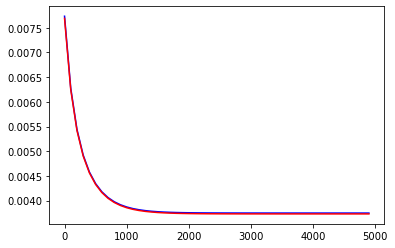

In [118]:
# Plot errors
plt.plot(range(0, 5000, 100), error_train3, c="blue")
plt.plot(range(0, 5000, 100), error_test3, c="red")
# #pass scaled data to the autoencoder
# X_reconstructed3 = auto_enc3(X_scaled.float())
# #plot the distribution of the reconstruction error
# sns.distplot(X_scaled - X_reconstructed3.detach().numpy())
# plt.xlabel("Reconstruction Error")
# plt.title("Reconstruction Error Distribution for Autoencoder")

**Written answer:**

 Which of your models performs the best?
 The one with three layers performs the best.
 
 After how many epochs does your best model reach convergence? 
 Roughly 1500 epochs the best model reaches convergence.
 
 Does your model overfit? If yes, why do you think this is? If no, why?
    The model does not overfit, because the train set and test set are very similar.

## Task 3: Benchmarking predictive capabilities of the compressed data. [30 pts]

For the final task, you will benchmark the different compression algorithms over the original data. For this:

1. Train a regularized logistic regression over the original TfIDF train set (with no compression) to predict the positive / negative class label for each movie. Calculate the AUROC over the test set.
2. Train a regularized logistic regression over the PCA-reduced dataset (with 60 components), and calculate the AUROC over the PCA-transformed test set.
3. Train a regularized logistic regression over the encoded dataset (with 60 variables), and calculate AUROC over the encoded test set.

**Written answer 1: Compare the performance of the three models: how do they compare?**

**Written answer 2: Which of the two compression methods (methods 2 and 3) is better at compressing the data without altering its predictive capacity? Why do you think this happens?**

In [87]:
# Full dataset regression and AUC plot / calculation
logreg = LogisticRegressionCV(max_iter = 10000)
logreg.fit(TfIDF_test,y_test)
y_pred = logreg.predict(TfIDF_test)
roc_auc_score(y_test,y_pred)

0.8786692759295499

In [100]:
# PCA dataset regression and AUC plot / calculation
logreg2 = LogisticRegressionCV(max_iter = 10000)
PCA_q3 = PCA(n_components = 60)
X1 = pd.DataFrame(PCA_q3.fit_transform(TfIDF_test))
logreg2.fit(X1,y_test)
y_pred2 = logreg2.predict(X1)
roc_auc_score(y_test,y_pred2)

0.8460238391745241

In [99]:
# Autoencoder dataset regression and AUC plot / calculation
logreg3 = LogisticRegressionCV(max_iter = 10000)
auto_enc_q3 = autoencoder()
X_scaled = torch.from_numpy(TfIDF_test)
X2 = auto_enc_q3.encoder(X_scaled.float())
X2 = X2.detach().numpy()
logreg3.fit(X2,y_test)
y_pred3 = logreg3.predict(X2)
roc_auc_score(y_test,y_pred3)

0.6222647215797901

**Written answer:**
1.The original TFidf train set performs the best.since it has the highest AUROC value
2.The PCA dataset regression is better at compressing the data without altering its predictive capacity, this is because Autoencoder dataset is less effective in terms of data compression while PCA dataset regression is designed to perform data compression